In questo notebook ti devi assicurare di avere installato:
**numpy
matplotlib
scipy**

Per controllare quali sono i pacchetti installati nel tuo ambiente conda procedi così:

In [1]:
!conda list

# packages in environment at C:\Anaconda3\envs\py36:
#
# Name                    Version                   Build  Channel
alabaster                 0.7.10                   py36_0    conda-forge
asn1crypto                0.22.0                   py36_0    conda-forge
astroid                   1.4.8                    py36_0    conda-forge
astropy                   3.0.3                    py36_1    conda-forge
autovizwidget             0.12.1                   py36_0    conda-forge
babel                     2.4.0                    py36_0    conda-forge
backports.weakref         1.0rc1                   py36_0    conda-forge
basemap                   1.1.0                    py36_2    conda-forge
basemap-data-hires        1.1.0                         0    conda-forge
bkcharts                  0.2                      py36_0    conda-forge
blas                      1.0                         mkl  
bleach                    1.5.0                    py36_0    conda-forge
bokeh          

Importiamo numpy come np:

In [2]:
import numpy as np

La funzione densità di probabilità, in breve **PDF**, ci dice quanto densa è la probabilità che una variabile casuale continua assuma un dato valore in un dato intervallo. In teoria della probabilità è molto importante la distribuzione normale o distribuzione gaussiana, ovvero la PDF che assume una variabile casuale continua.

**Il teorema del limite centrale** che afferma che *il valor medio di un insieme di variabili casuali indipendenti che rispettano una distribuzione generica con valor medio e varianza finiti tende alla distribuzione normale.*

In [3]:
from scipy.stats import norm

Qual è il valore assunto dalla PDF di valor medio 0 e varianza 1 (ovvero deviazione standard 1) in posizione 0?

In [4]:
norm.pdf(0)

0.3989422804014327

Questa non è esattamente una probabilità: 
1. PDF è un sempre non negativa
2. l'area sottesa dalla PDF globale è pari ad 1, ovvero è normalizzata 
3. la probabilità in un singolo punto è sempre pari a zero

A proposito del punto 3, ricordiamo che la probabilità si calcola sempre come un'area sottesa dalla funzione densità di probabilità e dipende quindi da un intervallo: se l'intervallo è nullo allora la probabilità è nulla.

Per determinare l'area sottesa bisogna procedere risolvendo un integrale definito che nel caso della funzione gaussiana non ammette soluzione analitica. In questo ci può aiutare **scipy** grazie alle soluzioni numeriche.

Se $\mu$ rappresenta il valor medio e $\sigma$ la deviazione standard, allora la probabilità di trovare la variabile casuale indipendente $x$ negli intervalli determinati da una, due o tre volte la deviazione standard sarà:

$P(x\in(\mu-\sigma,\mu+\sigma))=68\%$

$P(x\in(\mu-2\sigma,\mu+2\sigma))=95\%$

$P(x\in(\mu-3\sigma,\mu+3\sigma))=99,7\%$

Usiamo scipy per fornire questi risultati. La funzione quad permette di calcolare integrali definiti. Importiamola:

In [5]:
from scipy.integrate import quad

In [6]:
print('La probabilità di trovare x in un intervallo la cui semiampiezza è pari ad una deviazione standard è ','%.2f' %(100*quad(lambda x: norm.pdf(x),-1,1)[0]),'%')

La probabilità di trovare x in un intervallo la cui semiampiezza è pari ad una deviazione standard è  68.27 %


In [7]:
print('La probabilità di trovare x in un intervallo la cui semiampiezza è pari a due deviazioni standard è ','%.2f' %(100*quad(lambda x: norm.pdf(x),-2,2)[0]),'%')

La probabilità di trovare x in un intervallo la cui semiampiezza è pari a due deviazioni standard è  95.45 %


In [8]:
print('La probabilità di trovare x in un intervallo la cui semiampiezza è pari a tre deviazioni standard è ','%.2f' %(100*quad(lambda x: norm.pdf(x),-3,3)[0]),'%')

La probabilità di trovare x in un intervallo la cui semiampiezza è pari a tre deviazioni standard è  99.73 %


Adesso visualizziamo la distribuzione con il pacchetto grafico matplotlib. Importiamolo:

In [9]:
import matplotlib.pyplot as plt

definiamo x come una serie di punti equispaziati con la funzione di numpy linspace

In [10]:
x = np.linspace(-3,3,60)

definiamo y come i punti PDF della distribuzione normale corrispondenti ad x

In [11]:
y = norm.pdf(x)

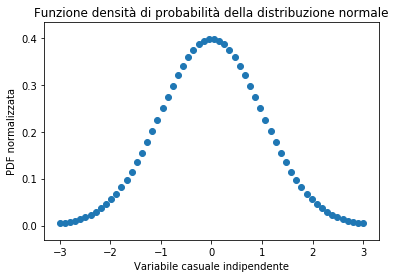

In [12]:
%matplotlib inline
plt.scatter(x,y)
plt.title('Funzione densità di probabilità della distribuzione normale')
plt.xlabel('Variabile casuale indipendente')
plt.ylabel('PDF normalizzata')
plt.show()

In scipy è di uso comune anche la PDF logaritmica:

In [13]:
y2 = norm.logpdf(x)

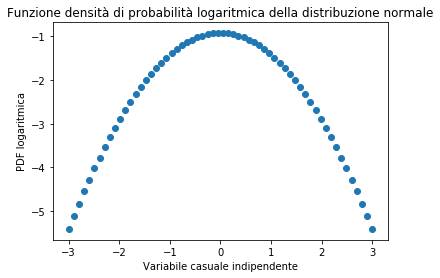

In [14]:
plt.scatter(x,y2)
plt.title('Funzione densità di probabilità logaritmica della distribuzione normale')
plt.xlabel('Variabile casuale indipendente')
plt.ylabel('PDF logaritmica')
plt.show()

La PDF logaritmica è utile dal punto di vista delle prestazioni computazionali, perché le PDF di più variabili casuali si calcolano usando il **prodotto** che è più oneroso per i calcoli, mentre le PDF logaritmiche con la **somma**.

La funzione densità cumulativa, o **CDF**, è definita come la probabilità $P(-\infty<x<x^*)$

In [15]:
y3 = norm.cdf(x)

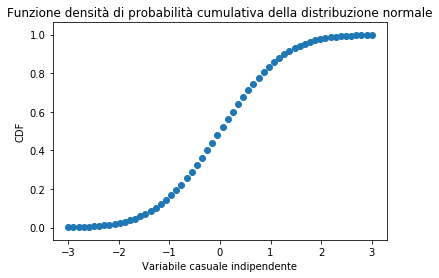

In [16]:
plt.scatter(x,y3)
plt.title('Funzione densità di probabilità cumulativa della distribuzione normale')
plt.xlabel('Variabile casuale indipendente')
plt.ylabel('CDF')
plt.show()

In [17]:
y4 = norm.logcdf(x)

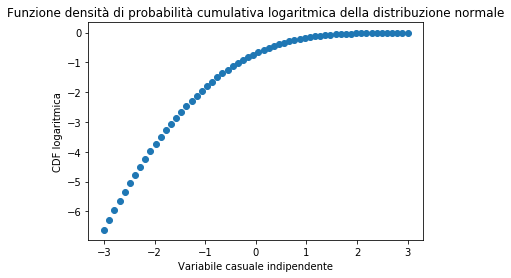

In [18]:
plt.scatter(x,y4)
plt.title('Funzione densità di probabilità cumulativa logaritmica della distribuzione normale')
plt.xlabel('Variabile casuale indipendente')
plt.ylabel('CDF logaritmica')
plt.show()

Passiamo ora a vedere come produrre campioni statistici che seguono la distribuzione normale. Per procedere in tal senso possiamo usare numpy:

In [19]:
r = np.random.randn(10)

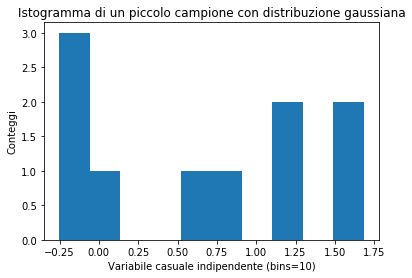

In [20]:
plt.hist(r,bins=10)
plt.title('Istogramma di un piccolo campione con distribuzione gaussiana')
plt.xlabel('Variabile casuale indipendente (bins=10)')
plt.ylabel('Conteggi')
plt.show()

Cosa accade se cambiamo il numero di bins? Proviamo rispettivamente con 3 e 20

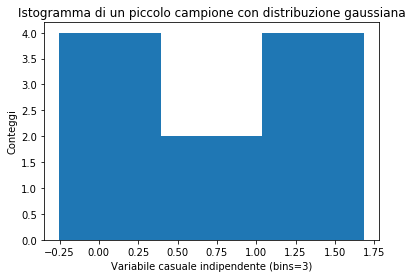

In [21]:
plt.hist(r,bins=3)
plt.title('Istogramma di un piccolo campione con distribuzione gaussiana')
plt.xlabel('Variabile casuale indipendente (bins=3)')
plt.ylabel('Conteggi')
plt.show()

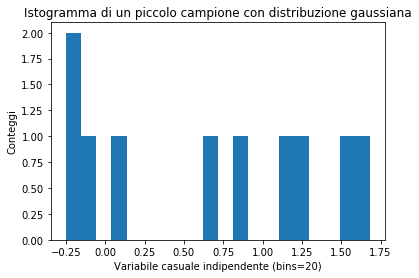

In [22]:
plt.hist(r,bins=20)
plt.title('Istogramma di un piccolo campione con distribuzione gaussiana')
plt.xlabel('Variabile casuale indipendente (bins=20)')
plt.ylabel('Conteggi')
plt.show()

Prendiamo un campione più grande ed aumentiamo di conseguenza il numero di bins

In [23]:
r2 = np.random.randn(10000)

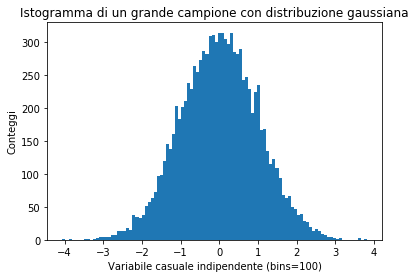

In [24]:
plt.hist(r2,bins=100)
plt.title('Istogramma di un grande campione con distribuzione gaussiana')
plt.xlabel('Variabile casuale indipendente (bins=100)')
plt.ylabel('Conteggi')
plt.show()

Proviamo a **deformare la distribuzione** moltiplicando np.random.randn per una nuova deviazione standard e sommando il valore medio della distribuzione:

In [25]:
r3 = 50*np.random.randn(10000) + 500

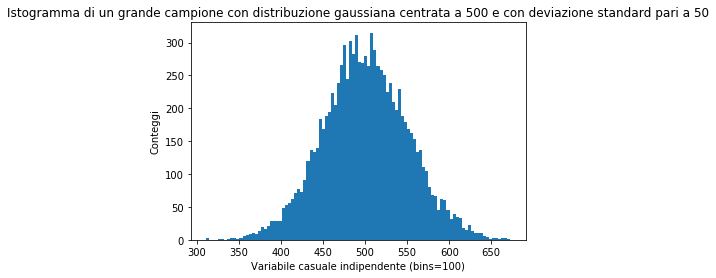

In [26]:
plt.hist(r3,bins=100)
plt.title('Istogramma di un grande campione con distribuzione gaussiana centrata a 500 e con deviazione standard pari a 50')
plt.xlabel('Variabile casuale indipendente (bins=100)')
plt.ylabel('Conteggi')
plt.show()

Con la stessa funzione possiamo anche aggiungere un'altra dimensione: consideriamo una seconda variabile indipendente che graficheremo lungo l'altro asse:

In [27]:
r2D = np.random.randn(10000, 2)

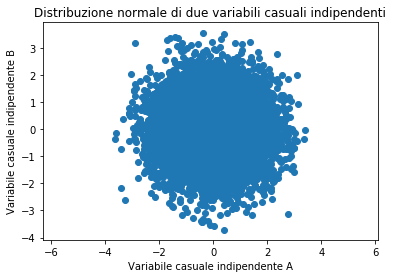

In [28]:
plt.scatter(r2D[:,0],r2D[:,1])
plt.axis('equal')
plt.title('Distribuzione normale di due variabili casuali indipendenti')
plt.xlabel('Variabile casuale indipendente A')
plt.ylabel('Variabile casuale indipendente B')
plt.show()

Cosa accade se la variabile A avesse una deviazione standard pari a 5 volte quella della variabile B?

In [29]:
r2D[:,0] = 5 * r2D[:,0]

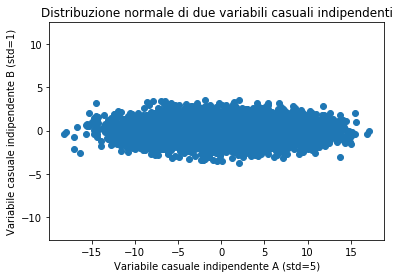

In [30]:
plt.scatter(r2D[:,0],r2D[:,1])
plt.axis('equal')
plt.title('Distribuzione normale di due variabili casuali indipendenti')
plt.xlabel('Variabile casuale indipendente A (std=5)')
plt.ylabel('Variabile casuale indipendente B (std=1)')
plt.show()

## Distribuzione normale bidimensionale multivariata

Per considerare il caso in cui le due variabili casuali sono in realtà **correlate tra loro** possiamo usare multivariate_normal dal pacchetto stats di scipy:

In [31]:
from scipy.stats import multivariate_normal as mvn

Stabiliamo qual è il valore medio inserendo un array di 2 elementi:

In [32]:
mu = np.array([0,2])

Introduciamo la covarianza delle variabili A e B come una matrice 2 per 2:

In [33]:
cov = np.array([[5, 0.8],[0.8, 1]])

Il set di valori bidimensionali statisticamente distribuito secondo la distribuzione normale ma affetto da correlazione si ottiene così:

In [34]:
rcov = mvn.rvs(mean=mu, cov=cov, size=5000)

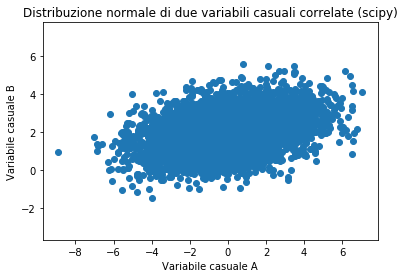

In [35]:
plt.scatter(rcov[:,0],rcov[:,1])
plt.axis('equal')
plt.title('Distribuzione normale di due variabili casuali correlate (scipy)')
plt.xlabel('Variabile casuale A')
plt.ylabel('Variabile casuale B')
plt.show()

La funzione multivariate_normal è inclusa anche nel pacchetto numpy.random:

In [36]:
rcov2 = np.random.multivariate_normal(mean=mu, cov=cov, size=5000)

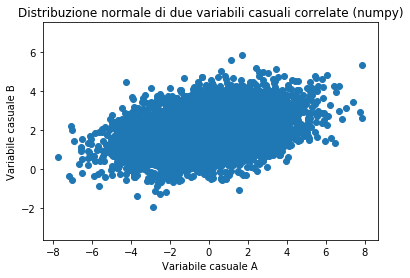

In [37]:
plt.scatter(rcov2[:,0],rcov2[:,1])
plt.axis('equal')
plt.title('Distribuzione normale di due variabili casuali correlate (numpy)')
plt.xlabel('Variabile casuale A')
plt.ylabel('Variabile casuale B')
plt.show()

I risultati non sono identici perché rcov ed rcov2 sono stati generati casualmente e in modo indipendente

## Fast Fourier Transform
Un'altra funzione molto interessante è la fast fourier transform che consente di passare dalla variabile tempo ad esempio di un segnale temporale alla sua variabile duale, ovvero la frequenza:

In [38]:
t = np.linspace(0, 100, 10000)

In [39]:
sig = 3*np.sin(t) + 2*np.sin(3*t) + 4*np.sin(5*t)

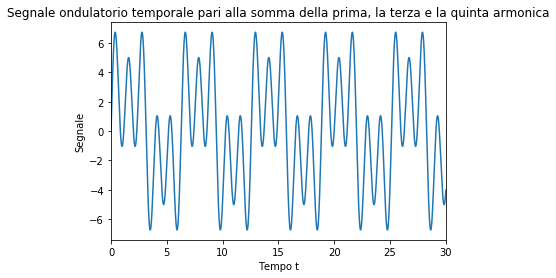

In [40]:
plt.plot(t,sig)
plt.title('Segnale ondulatorio temporale pari alla somma della prima, la terza e la quinta armonica')
plt.xlim((0,30))
plt.xlabel('Tempo t')
plt.ylabel('Segnale')
plt.show()

In [41]:
sig_transform = np.fft.fft(sig)

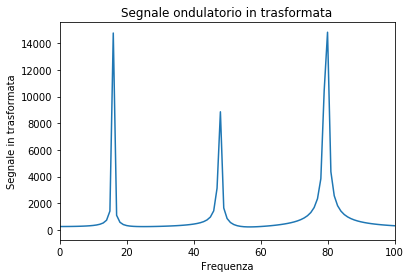

In [42]:
plt.plot(np.abs(sig_transform))
plt.title('Segnale ondulatorio in trasformata')
plt.xlim((0,100))
plt.xlabel('Frequenza')
plt.ylabel('Segnale in trasformata')
plt.show()

è possibile andare ad usare matplotlib nella sua versione originale usando una cell magic per poter visualizzare i picchi e andare a stimare i valori:

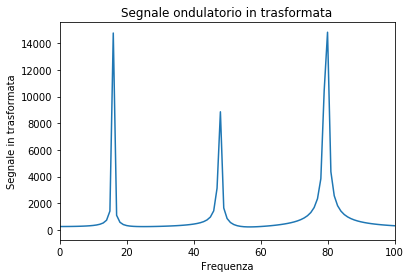

In [43]:
plt.plot(np.abs(sig_transform))
plt.title('Segnale ondulatorio in trasformata')
plt.xlim((0,100))
plt.xlabel('Frequenza')
plt.ylabel('Segnale in trasformata')
plt.show()

Vediamo che i picchi corrispondono alle frequenze 16, 48 e 80. Per conoscere gli ordini delle armoniche possiamo moltiplicare 2 pi greco per il valore di ciascun picco e dividere per il valore massimo della scala dei tempi ovvero 100: 

In [44]:
2*np.pi*16/100

1.0053096491487339

In [45]:
2*np.pi*48/100

3.015928947446201

In [46]:
2*np.pi*80/100

5.026548245743669

Quindi si tratta davvero della prima, la terza e la quinta armonica, rispettivamente